In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
sns.set();

## Задаем пути

In [2]:
PROJECT_FOLDER: str = 'P:\\Python Projects\\EDA_cardio'
DATASET_NAME: str = 'cardio_train.csv'
DATA_PATH: str = os.path.join(PROJECT_FOLDER, 'src', 'raw', DATASET_NAME)

RESULT_PATH: str = os.path.join(PROJECT_FOLDER, 'src', 'visualizations')

## Читаем и смотрим

In [3]:
data = pd.read_csv(os.path.join(DATA_PATH), sep=';')

In [4]:
data.shape

(70000, 13)

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# MAIN

In [7]:
label = data["cardio"]
data.drop("cardio", axis=1, inplace=True)
print('\n\nЗначение метки "cardio":')
print(label.value_counts())



Значение метки "cardio":
cardio
0    35021
1    34979
Name: count, dtype: int64


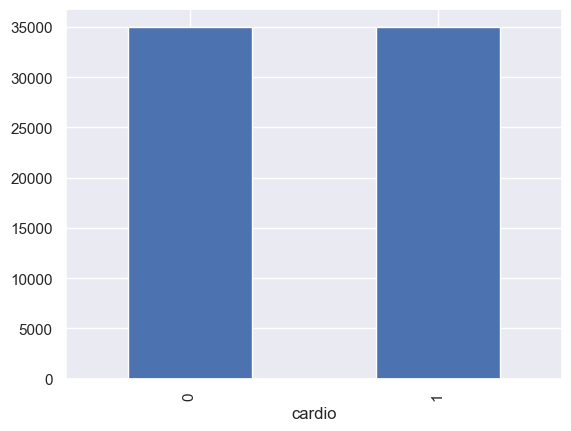

In [8]:
# создаем диаграмму, где ось x - это признак, а Y указывает значение метки
label.value_counts().plot(kind="bar");

In [9]:
categorical_features = ["gender", "ap_lo", "ap_hi", "cholesterol", "gluc", "smoke", "alco", "active"]
data[categorical_features] = data[categorical_features].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  category
 6   ap_lo        70000 non-null  category
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  category
 10  alco         70000 non-null  category
 11  active       70000 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 2.8 MB


In [13]:
continuous_features = set(data.columns) - set(categorical_features)
scaler = MinMaxScaler()
df_norm = data.copy()
df_norm[list(continuous_features)] = scaler.fit_transform(data[list(continuous_features)])

# Отбор признаков с помощью X^2

## Отбор признаков с использованием рекурсивного исключения признаков (RFE)

In [15]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_new = rfe.fit_transform(df_norm, label)
X_new

array([[0.00000000e+00, 5.88075881e-01, 5.79487179e-01, 2.73684211e-01,
        1.10000000e+02],
       [1.00001000e-05, 7.30158730e-01, 5.17948718e-01, 3.94736842e-01,
        1.40000000e+02],
       [2.00002000e-05, 6.24003097e-01, 5.64102564e-01, 2.84210526e-01,
        1.30000000e+02],
       ...,
       [9.99970000e-01, 6.40185830e-01, 6.56410256e-01, 5.00000000e-01,
        1.80000000e+02],
       [9.99990000e-01, 9.00735579e-01, 5.53846154e-01, 3.26315789e-01,
        1.35000000e+02],
       [1.00000000e+00, 7.54316686e-01, 5.89743590e-01, 3.26315789e-01,
        1.20000000e+02]])

## Отбор признаков с использованием случайного леса (Random Forest)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'gender'),
  Text(3, 0, 'height'),
  Text(4, 0, 'weight'),
  Text(5, 0, 'ap_hi'),
  Text(6, 0, 'ap_lo'),
  Text(7, 0, 'cholesterol'),
  Text(8, 0, 'gluc'),
  Text(9, 0, 'smoke'),
  Text(10, 0, 'alco'),
  Text(11, 0, 'active')])

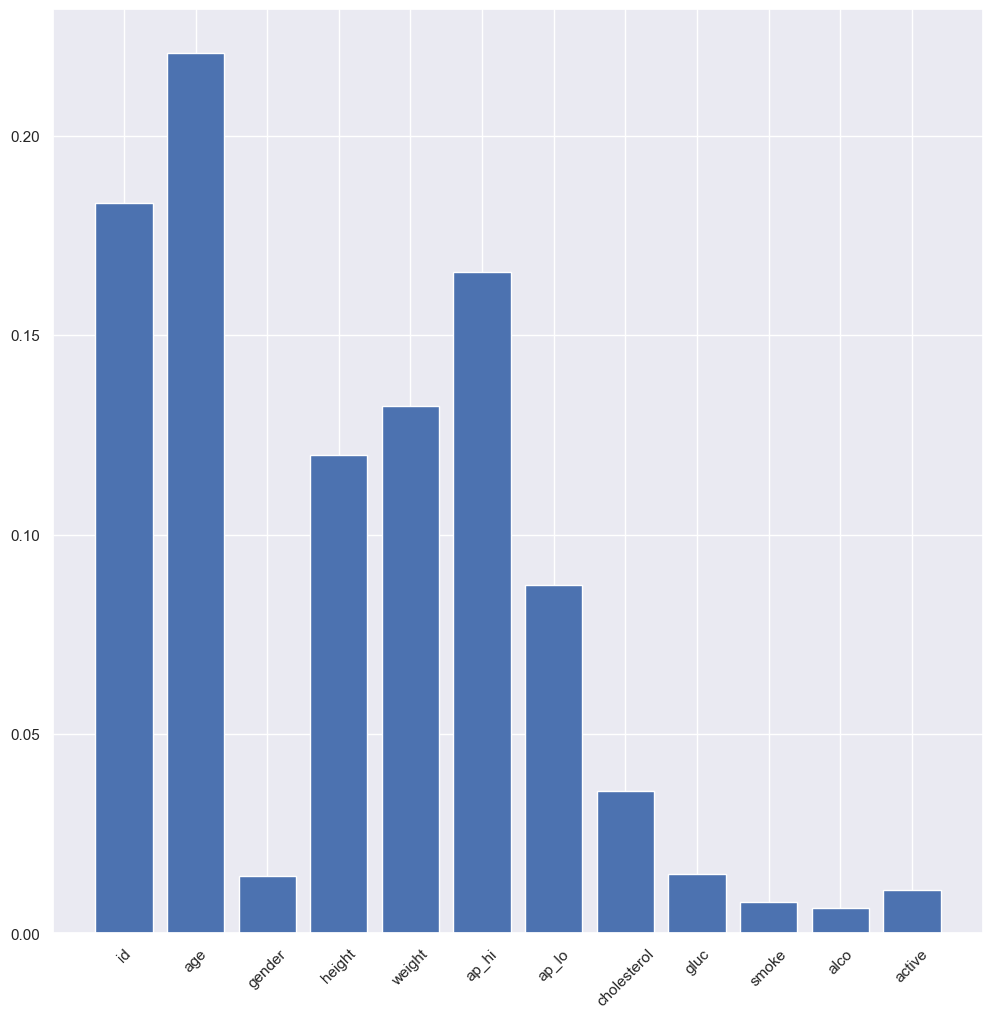

In [16]:
clf = RandomForestClassifier()
clf.fit(df_norm, label)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(df_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)